[View in Colaboratory](https://colab.research.google.com/github/khanyofficial/inkers1/blob/master/3A_trial_006.ipynb)

(60000, 28, 28)
Epoch 1/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1984 - acc: 0.9420
Epoch 2/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0672 - acc: 0.9795
Epoch 3/10
60000/60000 [==============================] - 60s 1000us/step - loss: 0.0503 - acc: 0.9849
Epoch 4/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0419 - acc: 0.9873
Epoch 5/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0357 - acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0311 - acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0275 - acc: 0.9919
Epoch 8/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0239 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0219 - acc: 0.9929
Epoch 10/10
60000/60000 [==============================] - 60s 998us/step - loss:

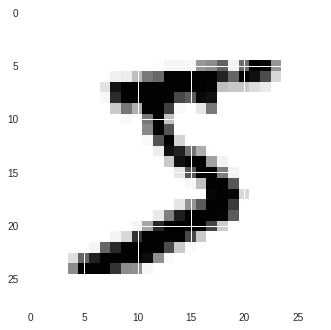

In [0]:
#https://learn.inkers.ai/courses/1/pages/session-1-%7C-ml-basics?module_item_id=1

import keras
import numpy as np
import time

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (X_train.shape)
from matplotlib import pyplot as plt
#%matplotlib inline
plt.imshow(X_train[0])

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[:10]
from keras.layers import Activation
start = time.time()
model = Sequential()

model.add(Convolution2D(8, (5, 5), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(8, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(model.summary())
end = time.time()
print("time taken to execute in secs - " , end - start)
print(model.summary())